# Credit Card Fraud Detection - Model Training

This notebook focuses on training a baseline Logistic Regression model for the `creditcard.csv` dataset.
Since this dataset is highly imbalanced, we will apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data.


In [3]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from eda_fraud_data import Eda

# Load Data
data_path = '../data/raw/creditcard.csv'
try:
    df = pd.read_csv(data_path)
    print(f"Data loaded. Shape: {df.shape}")
except FileNotFoundError:
    print("File not found. Please check the path.")

Data loaded. Shape: (284807, 31)


## Exploratory Data Analysis (EDA)

We will perform a quick EDA to understand the dataset structure and class distribution.
- **Time**: Seconds elapsed between each transaction and the first transaction.
- **Amount**: Transaction amount.
- **V1-V28**: PCA transformed features (anonymized).
- **Class**: 0 (Legitimate), 1 (Fraud).

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

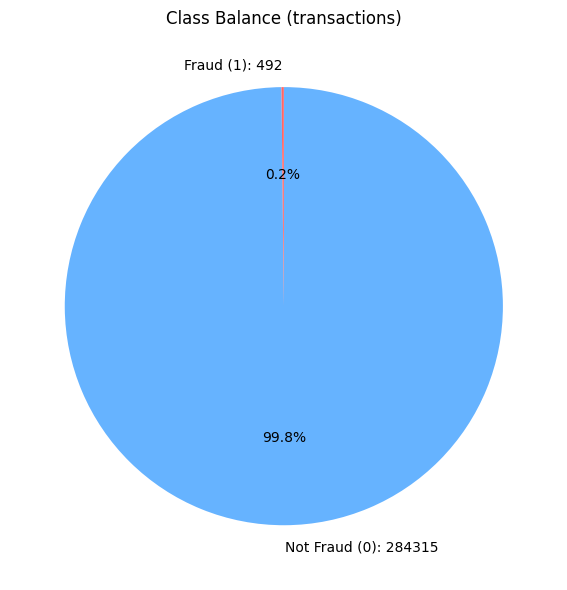

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
# Initialize EDA class
eda = Eda(df)

# Basic Info
eda.basic_exploration()

# Check Missing Values
eda.check_missing_values()

# Plot Class Balance
eda.plot_class_balance(target='Class')

## Data Preprocessing and Resampling

Since the dataset is highly imbalanced, we will:
1.  Scale `Amount` and `Time` (V1-V28 are already scaled).
2.  Split the data into Train and Test sets.
3.  Apply **SMOTE** to the Training set only.

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from modelling import FraudModel

# 1. Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# 2. Separate Features and Target
X = df.drop(columns=['Class'])
y = df['Class']

# 3. Split Data (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Apply SMOTE to Training Data Only
print("\nApplying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class Balance After SMOTE (Train):\n", y_train_resampled.value_counts(normalize=True))


Applying SMOTE...
Class Balance After SMOTE (Train):
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Class Balance After SMOTE (Train):
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


## Model Training and Evaluation

We will train a Logistic Regression model on the resampled data and evaluate it on the original test set.


--- Training Logistic Regression ---
Model training completed.

--- Model Evaluation ---
Model training completed.

--- Model Evaluation ---


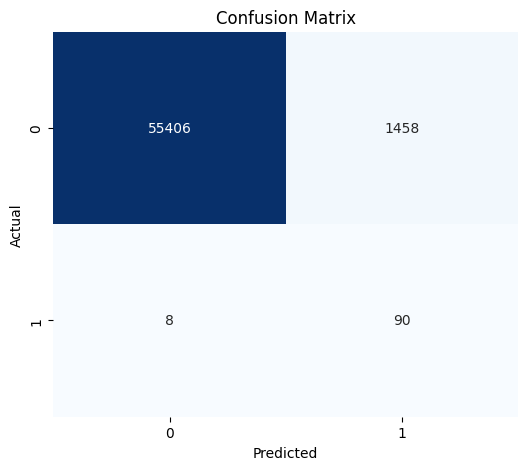


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9698
AUC-PR Score: 0.7703


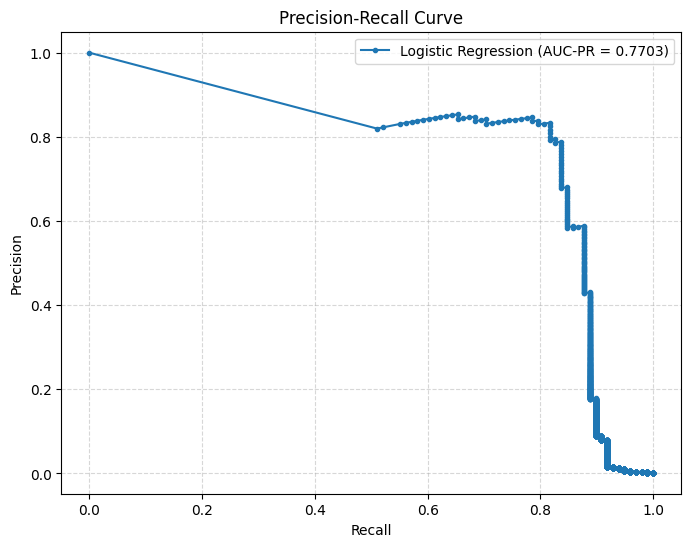

In [6]:
# Initialize Model Class
fraud_model = FraudModel()

# Train Logistic Regression on Resampled Data
model = fraud_model.train_logistic_regression(X_train_resampled, y_train_resampled, max_iter=1000, random_state=42)

# Evaluate on Test Data (Original distribution)
metrics = fraud_model.evaluate_model(X_test, y_test)